In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [12]:
def show_in_2d(  file_path ):
    # Load the data
    embeddings = np.load(file_path)
    
    # Apply PCA to reduce to 2 dimensions
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    
    # Plot the embeddings
    plt.figure(figsize=(8,6))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue', marker='o')
    
    # Optional
    plt.title('Face Embeddings Visualized with PCA')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')

    plt.show()

In [13]:
def show_in_3d(  file_path ):
    # Load the data
    embeddings = np.load(file_path)
    
    # Apply PCA to reduce to 3 dimensions
    pca = PCA(n_components=3)
    reduced_embeddings = pca.fit_transform(embeddings)
    
    # Plot the embeddings
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], reduced_embeddings[:, 2], c='blue', marker='o')
    
    # Optional
    ax.set_title('Face Embeddings Visualized with PCA')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')

    plt.show()

In [20]:
EMBEDDINGS_FILE = './model/face_embeddings.npy'
LABELS_FILE = './model/face_labels.npy'

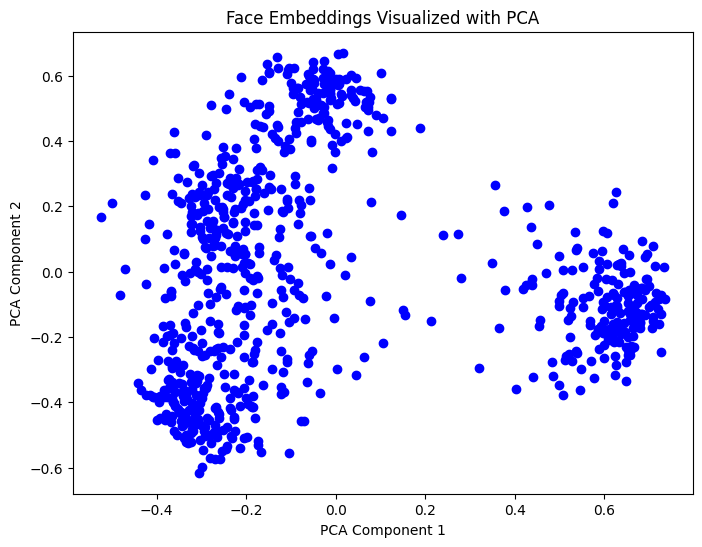

In [21]:
show_in_2d(EMBEDDINGS_FILE)

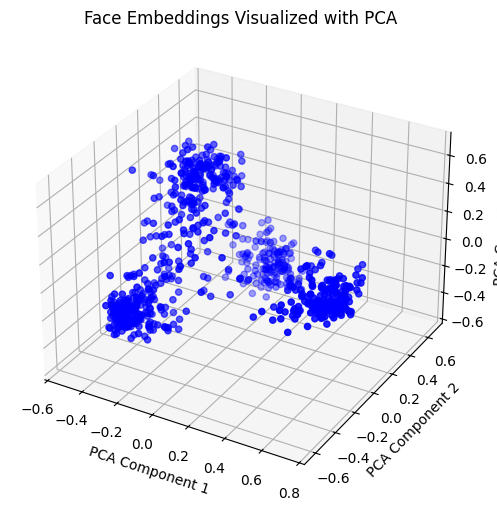

In [22]:
show_in_3d(EMBEDDINGS_FILE)

In [25]:
# show in 3d with labels and colors
def show_in_3d_with_labels(  file_path, labels_file ):
    # Load the data
    embeddings = np.load(file_path)
    labels = np.load(labels_file)
    
    # Apply PCA to reduce to 3 dimensions
    pca = PCA(n_components=3)
    reduced_embeddings = pca.fit_transform(embeddings)
    
    # Encode the labels into unique integers
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    
    # Generate a color map
    unique_labels = np.unique(encoded_labels)
    palette = (sns.color_palette("hls", len(unique_labels)))
    
    # Plot the embeddings
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    
    
    for i, label in enumerate(unique_labels):
        label_indices = np.where(encoded_labels == label)
        ax.scatter(
            reduced_embeddings[label_indices, 0], 
            reduced_embeddings[label_indices, 1], 
            reduced_embeddings[label_indices, 2], 
            c=[palette[i]], 
            label=label,
            marker='o'
        )
    
    # Optional
    ax.set_title('3D Visualization of Face Embeddings with PCA (Colored by Person)')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')
    ax.legend(loc='best')

    plt.show()

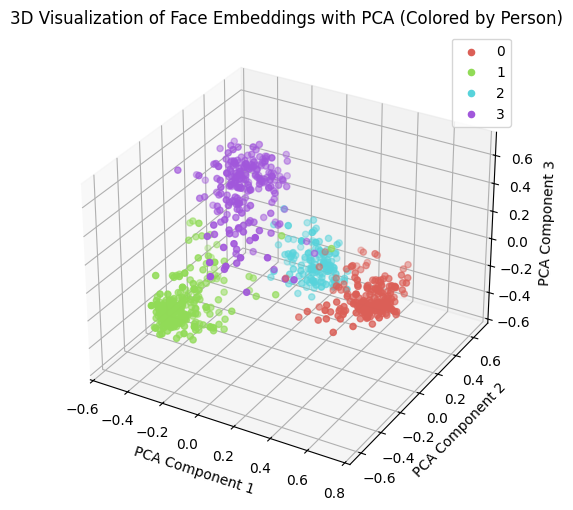

In [26]:
show_in_3d_with_labels(EMBEDDINGS_FILE, LABELS_FILE)